In [24]:
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy

from scipy.stats import probplot
from scipy import stats
#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [25]:
city = '서울 부산 대구 인천 광주 대전 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주'
zarib = '88.8 56.6 51.8 67.3 45.4 57.5 70.7 38.8 71.6 26.6 34.2 36.0 25.7 21.7 28.0 41.7 30.6'

city = list(city.split(' '))
zarib = list(map(float , zarib.split(' ')))
print(city)
print(zarib)
print(len(city))
print(len(zarib))

['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
[88.8, 56.6, 51.8, 67.3, 45.4, 57.5, 70.7, 38.8, 71.6, 26.6, 34.2, 36.0, 25.7, 21.7, 28.0, 41.7, 30.6]
17
17


In [26]:
a = pd.DataFrame([zarib] , columns = city)
a =a.transpose().reset_index()
a.rename(columns = {'index': '도시', 0 : '재정자립도'} , inplace =True)
a

,도시,재정자립도
0,서울,88.8
1,부산,56.6
2,대구,51.8
3,인천,67.3
4,광주,45.4
5,대전,57.5
6,울산,70.7
7,세종,38.8
8,경기,71.6
9,강원,26.6


88.8
56.6
51.8
67.3
45.4
57.5
70.7
38.8
71.6
26.6
34.2
36.0
25.7
21.7
28.0
41.7
30.6


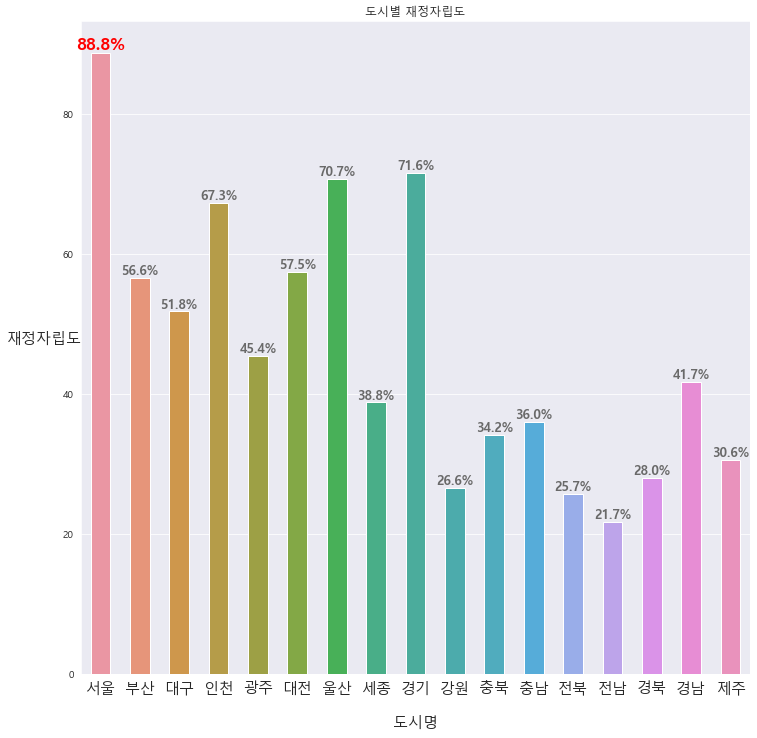

In [27]:
fig  = plt.figure(figsize=(12,12))
ax = plt.plot(figsize = (8,8))
fig.set_facecolor('white')

ax = sns.barplot(x=a['도시'] , y=a['재정자립도'])
ax.set_title('도시별 재정자립도')
ax.set_xlabel('도시명' , rotation = 0 , fontsize= 15 , labelpad=18)
ax.set_ylabel('재정자립도', rotation = 0 , fontsize = 15 , labelpad=18)
ax.set_xticklabels(city, rotation = 0 , fontsize= 15)
width = 0.5
for bar in ax.patches:
    x = bar.get_x() # 막대 좌측 하단 x 좌표
    old_width = bar.get_width() # 기존 막대 폭
    bar.set_width(width) # 폭변경
    bar.set_x(x+(old_width-width)/2) # 막대 좌측 하단 x 좌표 업데이트

for i,txt in enumerate(a['재정자립도']):
    b = txt
    print(b)
    if  b == max(a['재정자립도']):
        ax.text(i, b+0.4, str(txt)+'%' , ha='center' , color = 'red' , fontweight = 'bold' , fontsize=17)
        #어디 막대, 막대기의 위쪽에
    else:
        ax.text(i, b+0.5, str(txt)+'%' , ha='center' , color = 'dimgray' , fontsize=13 , fontweight = 'bold')
plt.show()

plt.show()


<ipython-input-28-b2eddf75b99a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(city, rotation = 0 , fontsize= 15)


[Text(0, 0, '서울'),
 Text(1, 0, '부산'),
 Text(2, 0, '대구'),
 Text(3, 0, '인천'),
 Text(4, 0, '광주'),
 Text(5, 0, '대전'),
 Text(6, 0, '울산'),
 Text(7, 0, '세종'),
 Text(8, 0, '경기'),
 Text(9, 0, '강원'),
 Text(10, 0, '충북'),
 Text(11, 0, '충남'),
 Text(12, 0, '전북'),
 Text(13, 0, '전남'),
 Text(14, 0, '경북'),
 Text(15, 0, '경남'),
 Text(16, 0, '제주')]

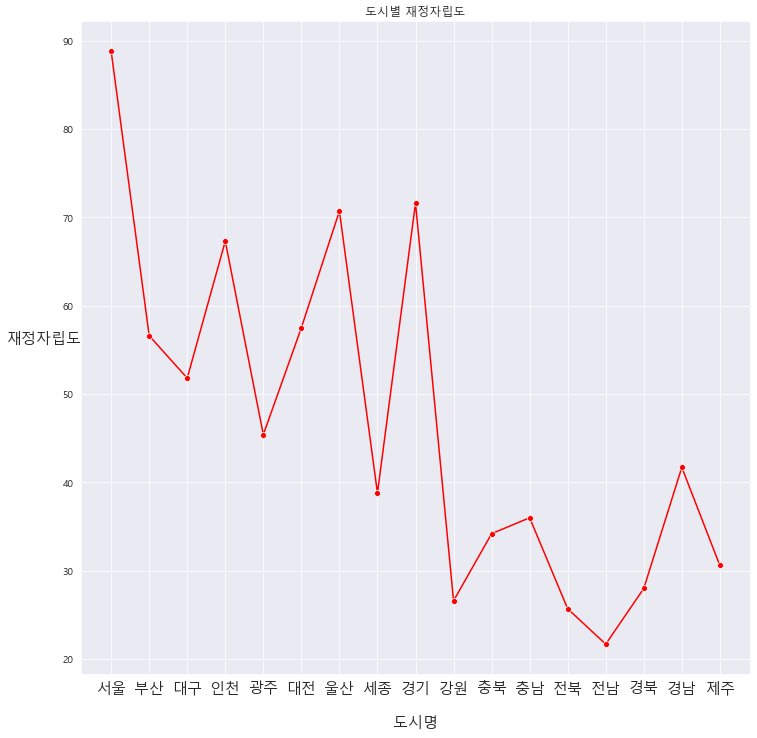

In [28]:
fig  = plt.figure(figsize=(12,12))
ax = plt.plot(figsize = (8,8))
fig.set_facecolor('white')

ax = sns.lineplot(x=a['도시'] , y=a['재정자립도'] ,  color='r', linestyle='-', marker='o')
ax.set_title('도시별 재정자립도')
ax.set_xlabel('도시명' , rotation = 0 , fontsize= 15 , labelpad=18)
ax.set_ylabel('재정자립도', rotation = 0 , fontsize = 15 , labelpad=18)
ax.set_xticklabels(city, rotation = 0 , fontsize= 15)

In [29]:
b = a.iloc[:8 , :]
b

,도시,재정자립도
0,서울,88.8
1,부산,56.6
2,대구,51.8
3,인천,67.3
4,광주,45.4
5,대전,57.5
6,울산,70.7
7,세종,38.8


([<matplotlib.patches.Wedge at 0x1ebdcb3c790>,
 [Text(0.6669817600835038, 0.4417412497332702, '서울'),
  Text(0.02239461677435878, 0.7996864892815995, '부산'),
  Text(-0.5068141516607733, 0.6189825649211541, '대구'),
  Text(-0.7959929108876778, 0.07997053092584587, '인천'),
  Text(-0.6405836591448374, -0.4792208005049561, '광주'),
  Text(-0.1984311273601827, -0.775000056577138, '대전'),
  Text(0.4476553260633638, -0.6630269293528759, '울산'),
  Text(0.7740102208144518, -0.20225770213953187, '세종')],
 [Text(0.5002363200626279, 0.3313059372999526, '18.6%'),
  Text(0.016795962580769083, 0.5997648669611996, '11.9%'),
  Text(-0.3801106137455799, 0.4642369236908655, '10.9%'),
  Text(-0.5969946831657582, 0.05997789819438439, '14.1%'),
  Text(-0.480437744358628, -0.359415600378717, '9.5%'),
  Text(-0.148823345520137, -0.5812500424328534, '12.1%'),
  Text(0.3357414945475228, -0.4972701970146569, '14.8%'),
  Text(0.5805076656108388, -0.15169327660464887, '8.1%')])

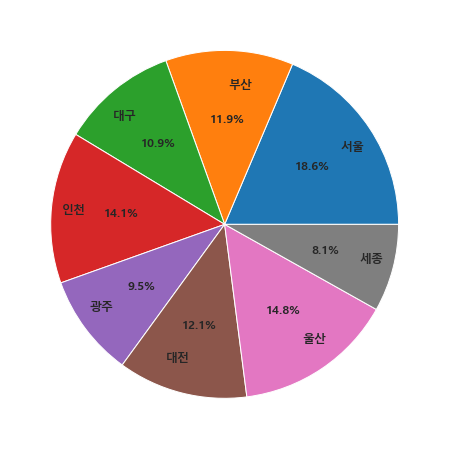

In [30]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

colors = sns.color_palette('bright')[0:5]

plt.pie(b.loc[:,'재정자립도'] , labels=b.loc[:,'도시'], labeldistance=0.8, autopct='%.1f%%' ,textprops={'fontsize' : 12, 'fontweight' : 'bold'})